In [1]:
import pandas as pd
import glob
import os
import numpy as np

In [5]:
import geopandas as gpd

In [2]:
img_dir=[]
## the folder of Fahad's images, which should contain ten folders
for root, dirs, files in os.walk(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\FahadImages'):
    img_dir.append(root)

# omit root folder name
img_dir=img_dir[1:]
img_dir

['D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Alley',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Commercial Throughway',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Downtown Commercial',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\HWY',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\HWY Ramp',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Industrial',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Neighborhood Commercial',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Neighborhood Residential',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Park',
 'D:\\Berkeley\\CE263N\\Project idea\\4weixin\\Boston\\FahadImages\\Residential Throughway']

In [3]:
imgs=pd.DataFrame()
for folder in img_dir:
    files=glob.glob(folder+'\\*jpg')
    for i in files:
        street_type=i.split('\\')[-2]
        name=i.split('\\')[-1]
        temp=i.split('\\')[-1].split('_')[-1].split(',')
        lat=temp[0].split('-')[-1]
        lon=temp[1]
        
        series=pd.DataFrame([[i,name,street_type,lat,lon]])
        imgs=pd.concat([imgs,series])
imgs.columns=['path','name','img_type','lat','lon']    

In [7]:
imgs['Points']=gpd.points_from_xy(imgs['lon'].astype('float'),imgs['lat'].astype('float'))

In [9]:
imgs=gpd.GeoDataFrame(imgs, geometry='Points')

In [10]:
imgs.head()

,path,name,img_type,lat,lon,Points
0,D:\Berkeley\CE263N\Project idea\4weixin\Boston...,"103477482_0-42.349903626712845,-71.08304276122...",Alley,42.349903626712845,-71.08304276122757,POINT (-71.08304 42.34990)
0,D:\Berkeley\CE263N\Project idea\4weixin\Boston...,"103477482_1-42.349903626712845,-71.08304276122...",Alley,42.349903626712845,-71.08304276122757,POINT (-71.08304 42.34990)
0,D:\Berkeley\CE263N\Project idea\4weixin\Boston...,"104166949_0-42.35787702952917,-71.069867192384...",Alley,42.35787702952917,-71.0698671923843,POINT (-71.06987 42.35788)
0,D:\Berkeley\CE263N\Project idea\4weixin\Boston...,"104166949_1-42.35787702952917,-71.069867192384...",Alley,42.35787702952917,-71.0698671923843,POINT (-71.06987 42.35788)
0,D:\Berkeley\CE263N\Project idea\4weixin\Boston...,"105262004_0-42.344428207651674,-71.06819520394...",Alley,42.344428207651674,-71.06819520394998,POINT (-71.06820 42.34443)


<AxesSubplot:>

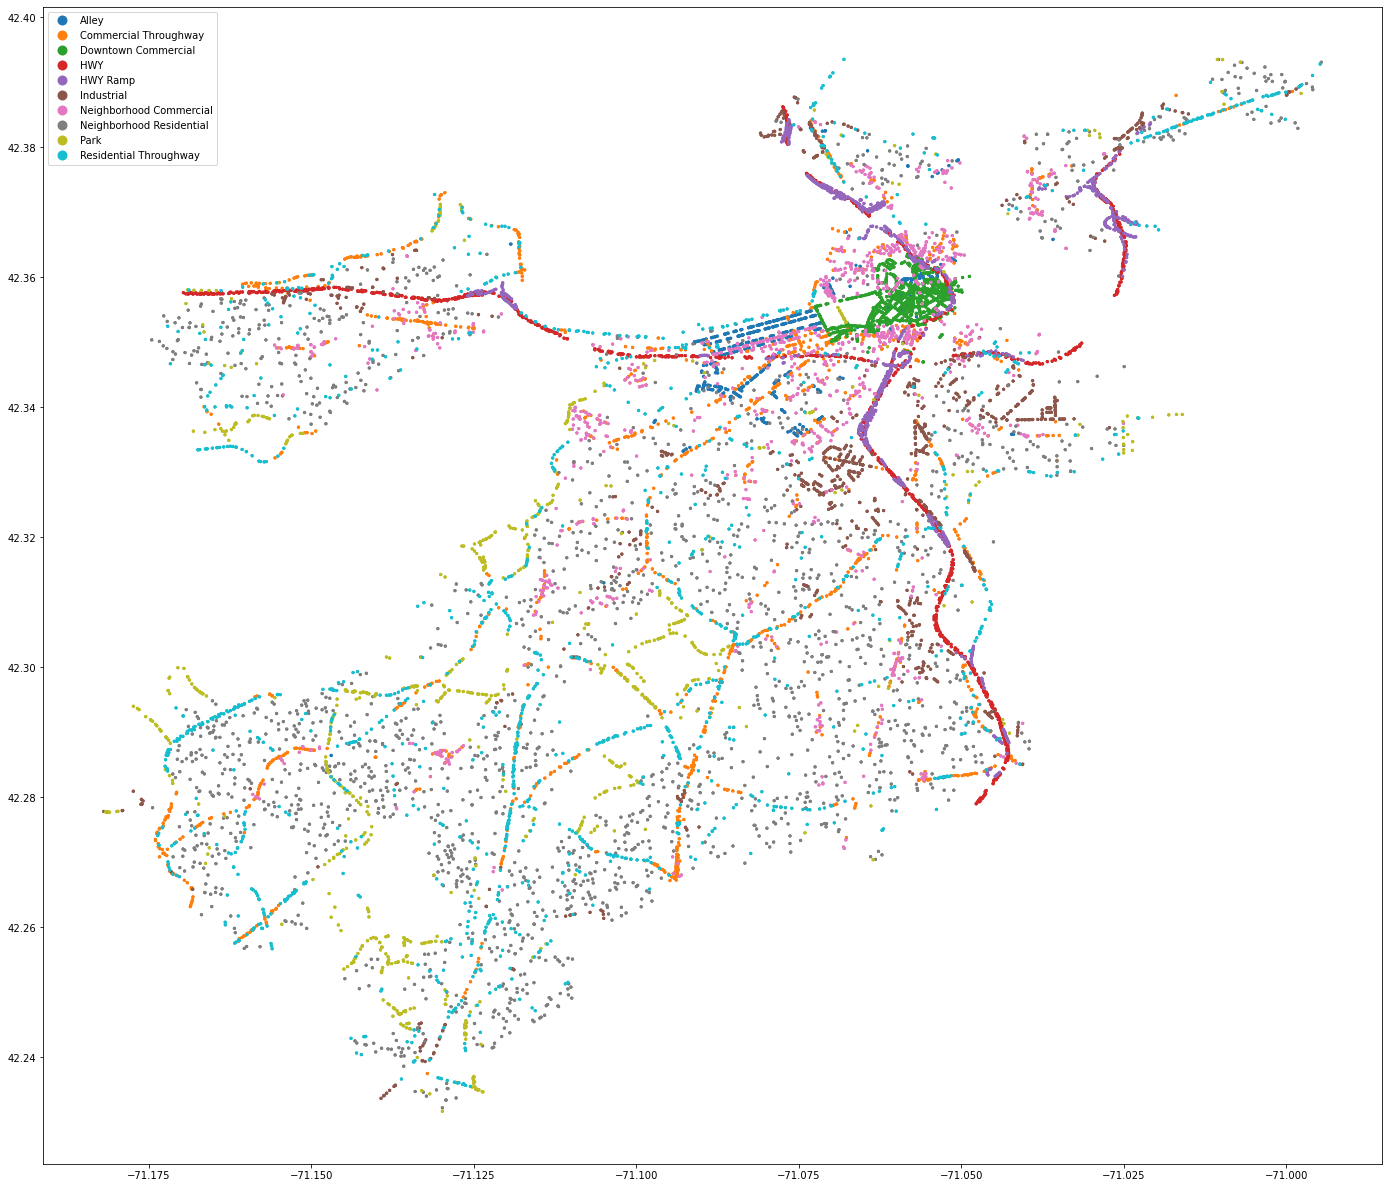

In [16]:
imgs.plot(column='img_type',figsize=[24,48],markersize=5,legend=True)

In [17]:
OD=pd.read_pickle('ODroutes.pkl')

In [18]:
OD.head()

,routes,Freq,orig,orig_centroid,dest,dest_centroid,orig_nodes,dest_nodes,replace,network_routes
0,"25025070101,25025030300",2404,25025070101,POINT (-71.05754 42.35277),25025030300,POINT (-71.05565 42.36023),527724553,1196431205,1196431205,"[527724553, 61445225, 61445244, 61445038, 6134..."
1,"25025050400,25025030300",21,25025050400,POINT (-71.03790 42.36822),25025030300,POINT (-71.05565 42.36023),61350590,1196431205,1196431205,"[61350590, 61353435, 61350605, 61363653, 29384..."
2,"25025981700,25025030300",616,25025981700,POINT (-71.06715 42.35474),25025030300,POINT (-71.05565 42.36023),61353360,1196431205,1196431205,"[61353360, 7707946396, 61470782, 61341207, 613..."
3,"25025981300,25025030300",288,25025981300,POINT (-71.01360 42.36370),25025030300,POINT (-71.05565 42.36023),2079414430,1196431205,1196431205,"[2079414430, 2079424122, 61439140, 2079450980,..."
4,"25025070300,25025030300",319,25025070300,POINT (-71.07036 42.34841),25025030300,POINT (-71.05565 42.36023),61366695,1196431205,1196431205,"[61366695, 1185484845, 61352738, 61350429, 613..."


In [24]:
# networkx routes to geometries 
# code adapted from: https://stackoverflow.com/questions/54641004/save-a-route-and-conserve-its-curvature-with-python-osmnx
from shapely.geometry import MultiLineString
def route_to_geo(G,osmRoutes):
    test_gdf=[]
    edges = ox.graph_to_gdfs(G, nodes=False).set_index(['u', 'v']).sort_index()
    for route in osmRoutes:
        route_pairwise = zip(route[:-1], route[1:])
        lines = [edges.loc[uv, 'geometry'].iloc[0] for uv in route_pairwise]
        multiline=MultiLineString(lines)
        test_gdf.append(multiline)
    return(test_gdf)

In [22]:
import networkx as nx
import osmnx as ox
G=ox.io.load_graphml('BostonGraph.graphml')

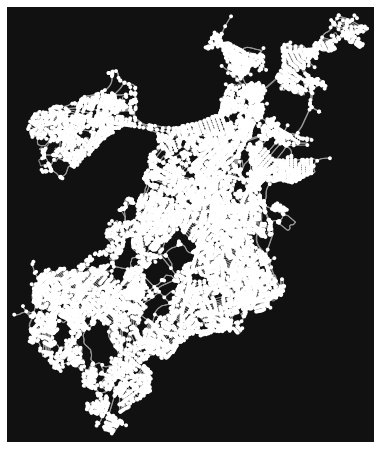

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [23]:
ox.plot_graph(G)

In [25]:
routeGeo=route_to_geo(G,OD['network_routes'])

In [26]:
OD['route_geo']=routeGeo

In [28]:
OD.head()

,routes,Freq,orig,orig_centroid,dest,dest_centroid,orig_nodes,dest_nodes,replace,network_routes,route_geo
0,"25025070101,25025030300",2404,25025070101,POINT (-71.05754 42.35277),25025030300,POINT (-71.05565 42.36023),527724553,1196431205,1196431205,"[527724553, 61445225, 61445244, 61445038, 6134...","(LINESTRING (-71.0571623 42.3526969, -71.05766..."
1,"25025050400,25025030300",21,25025050400,POINT (-71.03790 42.36822),25025030300,POINT (-71.05565 42.36023),61350590,1196431205,1196431205,"[61350590, 61353435, 61350605, 61363653, 29384...","(LINESTRING (-71.03798089999999 42.3681145, -7..."
2,"25025981700,25025030300",616,25025981700,POINT (-71.06715 42.35474),25025030300,POINT (-71.05565 42.36023),61353360,1196431205,1196431205,"[61353360, 7707946396, 61470782, 61341207, 613...","(LINESTRING (-71.069119 42.3556265, -71.069131..."
3,"25025981300,25025030300",288,25025981300,POINT (-71.01360 42.36370),25025030300,POINT (-71.05565 42.36023),2079414430,1196431205,1196431205,"[2079414430, 2079424122, 61439140, 2079450980,...","(LINESTRING (-71.0179966 42.3660436, -71.01790..."
4,"25025070300,25025030300",319,25025070300,POINT (-71.07036 42.34841),25025030300,POINT (-71.05565 42.36023),61366695,1196431205,1196431205,"[61366695, 1185484845, 61352738, 61350429, 613...","(LINESTRING (-71.0693636 42.3486073, -71.06932..."


In [40]:
income=pd.read_csv(r'D:\Berkeley\CE263N\Project idea\ACSST5Y2018.S1902_2020-11-04T233028\ACSST5Y2018.S1902_data_with_overlays_2020-11-04T233025.csv',skiprows=1)
income=income[['id','Geographic Area Name', 'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households']]
income=income.rename(columns={'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households':'Mean income'})
id=[i.split('US')[-1] for i in np.array(income.id)]
income.id=id
income['Mean income'].astype('float',errors='ignore')
income = income[income['Mean income'].str.isnumeric()]
income = income[['id','Mean income']]
income.to_pickle('BostonIncomeTracts.pkl')

In [72]:
# Boston city boundary
Boston=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\City_of_Boston_Boundary-shp\City_of_Boston_Boundary.shp')
Boston=Boston.to_crs('EPSG:4326')
# Boston census tracts
Boston_tracts=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston_tracts_wTGPopAndOtherPopOAP_racial.geojson')
Boston_tracts=gpd.clip(Boston_tracts,Boston,keep_geom_type=True)
Boston_tracts=Boston_tracts[['GEOID10', 'neighbour', 'geometry']]
Boston_tracts['tract_centroid']=Boston_tracts['geometry'].centroid
Boston_tracts.head()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,GEOID10,neighbour,geometry,tract_centroid
9,25021416102,White,"MULTIPOLYGON (((-71.13075 42.22796, -71.13074 ...",POINT (-71.11949 42.23896)
68,25021416400,White,"POLYGON ((-71.06813 42.27099, -71.06814 42.271...",POINT (-71.06809 42.27103)
90,25021416300,White,"MULTIPOLYGON (((-71.09374 42.26708, -71.09374 ...",POINT (-71.08812 42.26832)
91,25021416200,White,"POLYGON ((-71.09374 42.26711, -71.09374 42.267...",POINT (-71.09384 42.26710)
102,25021402300,White,"POLYGON ((-71.13666 42.23191, -71.13582 42.231...",POINT (-71.13350 42.22974)


In [80]:
income.head()

,id,Mean income
0,25025000100,100193
1,25025000201,106950
2,25025000202,103198
3,25025000301,125179
4,25025000302,117576


In [81]:
BostonIncomeTracts=pd.merge(Boston_tracts,income,left_on='GEOID10',right_on='id')
BostonIncomeTracts.to_pickle('BostonIncomeTracts.pkl')

In [106]:
ipkl=pd.read_pickle('BostonIncomeTracts.pkl')

In [107]:
ipkl.head()

,GEOID10,neighbour,geometry,tract_centroid,id,Mean income
0,25025010405,White,"POLYGON ((-71.08996 42.34392, -71.09020 42.343...",POINT (-71.08961 42.33987),25025010405,34402
1,25025010404,White,"POLYGON ((-71.08580 42.34333, -71.08505 42.342...",POINT (-71.08864 42.34197),25025010404,43827
2,25025010801,White,"POLYGON ((-71.07251 42.35545, -71.07230 42.355...",POINT (-71.07702 42.35412),25025010801,212083
3,25025010702,White,"POLYGON ((-71.07066 42.35185, -71.07045 42.351...",POINT (-71.07552 42.35184),25025010702,275685
4,25025010204,White,"POLYGON ((-71.10114 42.34776, -71.10087 42.347...",POINT (-71.10334 42.34630),25025010204,68490


In [108]:
ipkl.columns

Index(['GEOID10', 'neighbour', 'geometry', 'tract_centroid', 'id',
       'Mean income'],
      dtype='object')

In [109]:
ipkl[['GEOID10', 'neighbour', 'geometry', 'tract_centroid','Mean income']].to_pickle('BostonIncomeTracts.pkl')

In [83]:
BostonIncomeTracts=gpd.GeoDataFrame(BostonIncomeTracts,geometry='geometry')

In [85]:
BostonIncomeTracts.head()

,GEOID10,neighbour,geometry,tract_centroid,id,Mean income
0,25025010405,White,"POLYGON ((-71.08996 42.34392, -71.09020 42.343...",POINT (-71.08961 42.33987),25025010405,34402
1,25025010404,White,"POLYGON ((-71.08580 42.34333, -71.08505 42.342...",POINT (-71.08864 42.34197),25025010404,43827
2,25025010801,White,"POLYGON ((-71.07251 42.35545, -71.07230 42.355...",POINT (-71.07702 42.35412),25025010801,212083
3,25025010702,White,"POLYGON ((-71.07066 42.35185, -71.07045 42.351...",POINT (-71.07552 42.35184),25025010702,275685
4,25025010204,White,"POLYGON ((-71.10114 42.34776, -71.10087 42.347...",POINT (-71.10334 42.34630),25025010204,68490


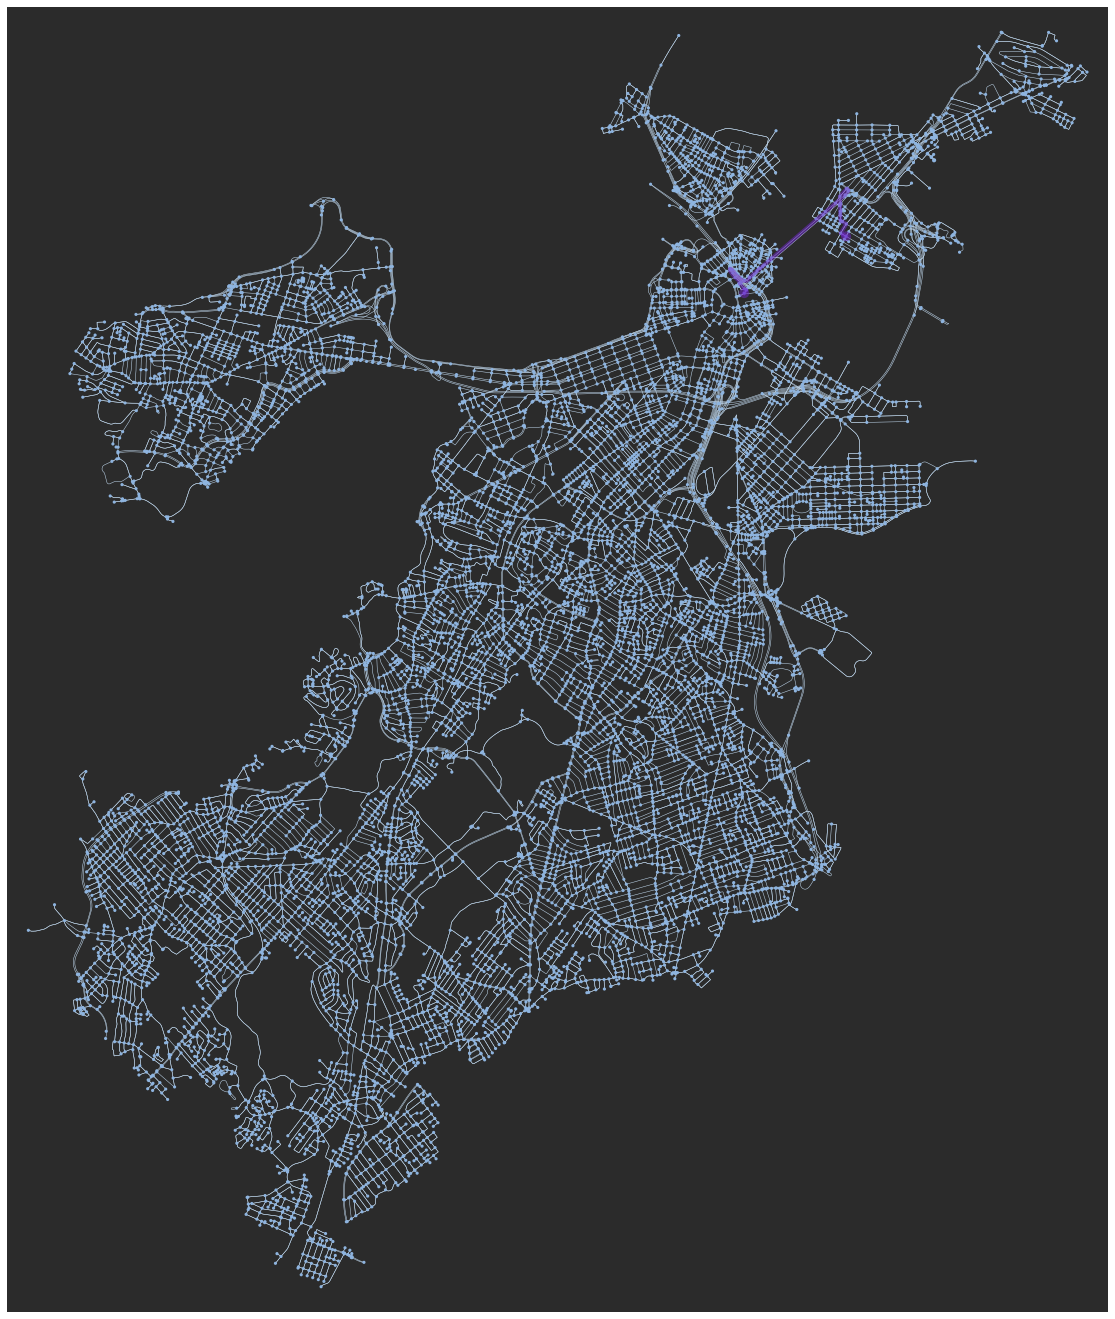

(<Figure size 1728x1728 with 1 Axes>, <AxesSubplot:>)

In [48]:
ox.plot_graph_route(G,route=OD.network_routes[1],figsize=(24,24), 
                         route_color='#7128ce',
                          route_linewidth=4, route_alpha=0.5,node_size=10,
                          edge_linewidth=0.5,bgcolor='#2b2b2b',node_color='#8eb4df',edge_color='#c2daf0',
                         orig_dest_size=100)

In [70]:
orig=OD['orig_nodes']
dest=OD['replace']
ODpairs=np.array([orig,dest]).T

In [68]:
def length(G,i):
    return nx.shortest_path_length(G, source=i[0], target=i[1], weight='length')

In [71]:
lengths=[length(G,i) for i in ODpairs]

In [77]:
OD['lengths']=lengths

In [ ]:
OD.head()

In [84]:
OD=gpd.GeoDataFrame(OD,geometry='route_geo')

In [105]:
OD.to_pickle('ODroutes.pkl')

In [110]:
OD.head()

,routes,Freq,orig,orig_centroid,dest,dest_centroid,orig_nodes,dest_nodes,replace,network_routes,route_geo,lengths
0,"25025070101,25025030300",2404,25025070101,POINT (-71.05754 42.35277),25025030300,POINT (-71.05565 42.36023),527724553,1196431205,1196431205,"[527724553, 61445225, 61445244, 61445038, 6134...","MULTILINESTRING ((-71.05716 42.35270, -71.0576...",3449.234
1,"25025050400,25025030300",21,25025050400,POINT (-71.03790 42.36822),25025030300,POINT (-71.05565 42.36023),61350590,1196431205,1196431205,"[61350590, 61353435, 61350605, 61363653, 29384...","MULTILINESTRING ((-71.03798 42.36811, -71.0380...",3638.025
2,"25025981700,25025030300",616,25025981700,POINT (-71.06715 42.35474),25025030300,POINT (-71.05565 42.36023),61353360,1196431205,1196431205,"[61353360, 7707946396, 61470782, 61341207, 613...","MULTILINESTRING ((-71.06912 42.35563, -71.0691...",1617.742
3,"25025981300,25025030300",288,25025981300,POINT (-71.01360 42.36370),25025030300,POINT (-71.05565 42.36023),2079414430,1196431205,1196431205,"[2079414430, 2079424122, 61439140, 2079450980,...","MULTILINESTRING ((-71.01800 42.36604, -71.0179...",5207.112
4,"25025070300,25025030300",319,25025070300,POINT (-71.07036 42.34841),25025030300,POINT (-71.05565 42.36023),61366695,1196431205,1196431205,"[61366695, 1185484845, 61352738, 61350429, 613...","MULTILINESTRING ((-71.06936 42.34861, -71.0693...",2412.788


<AxesSubplot:>

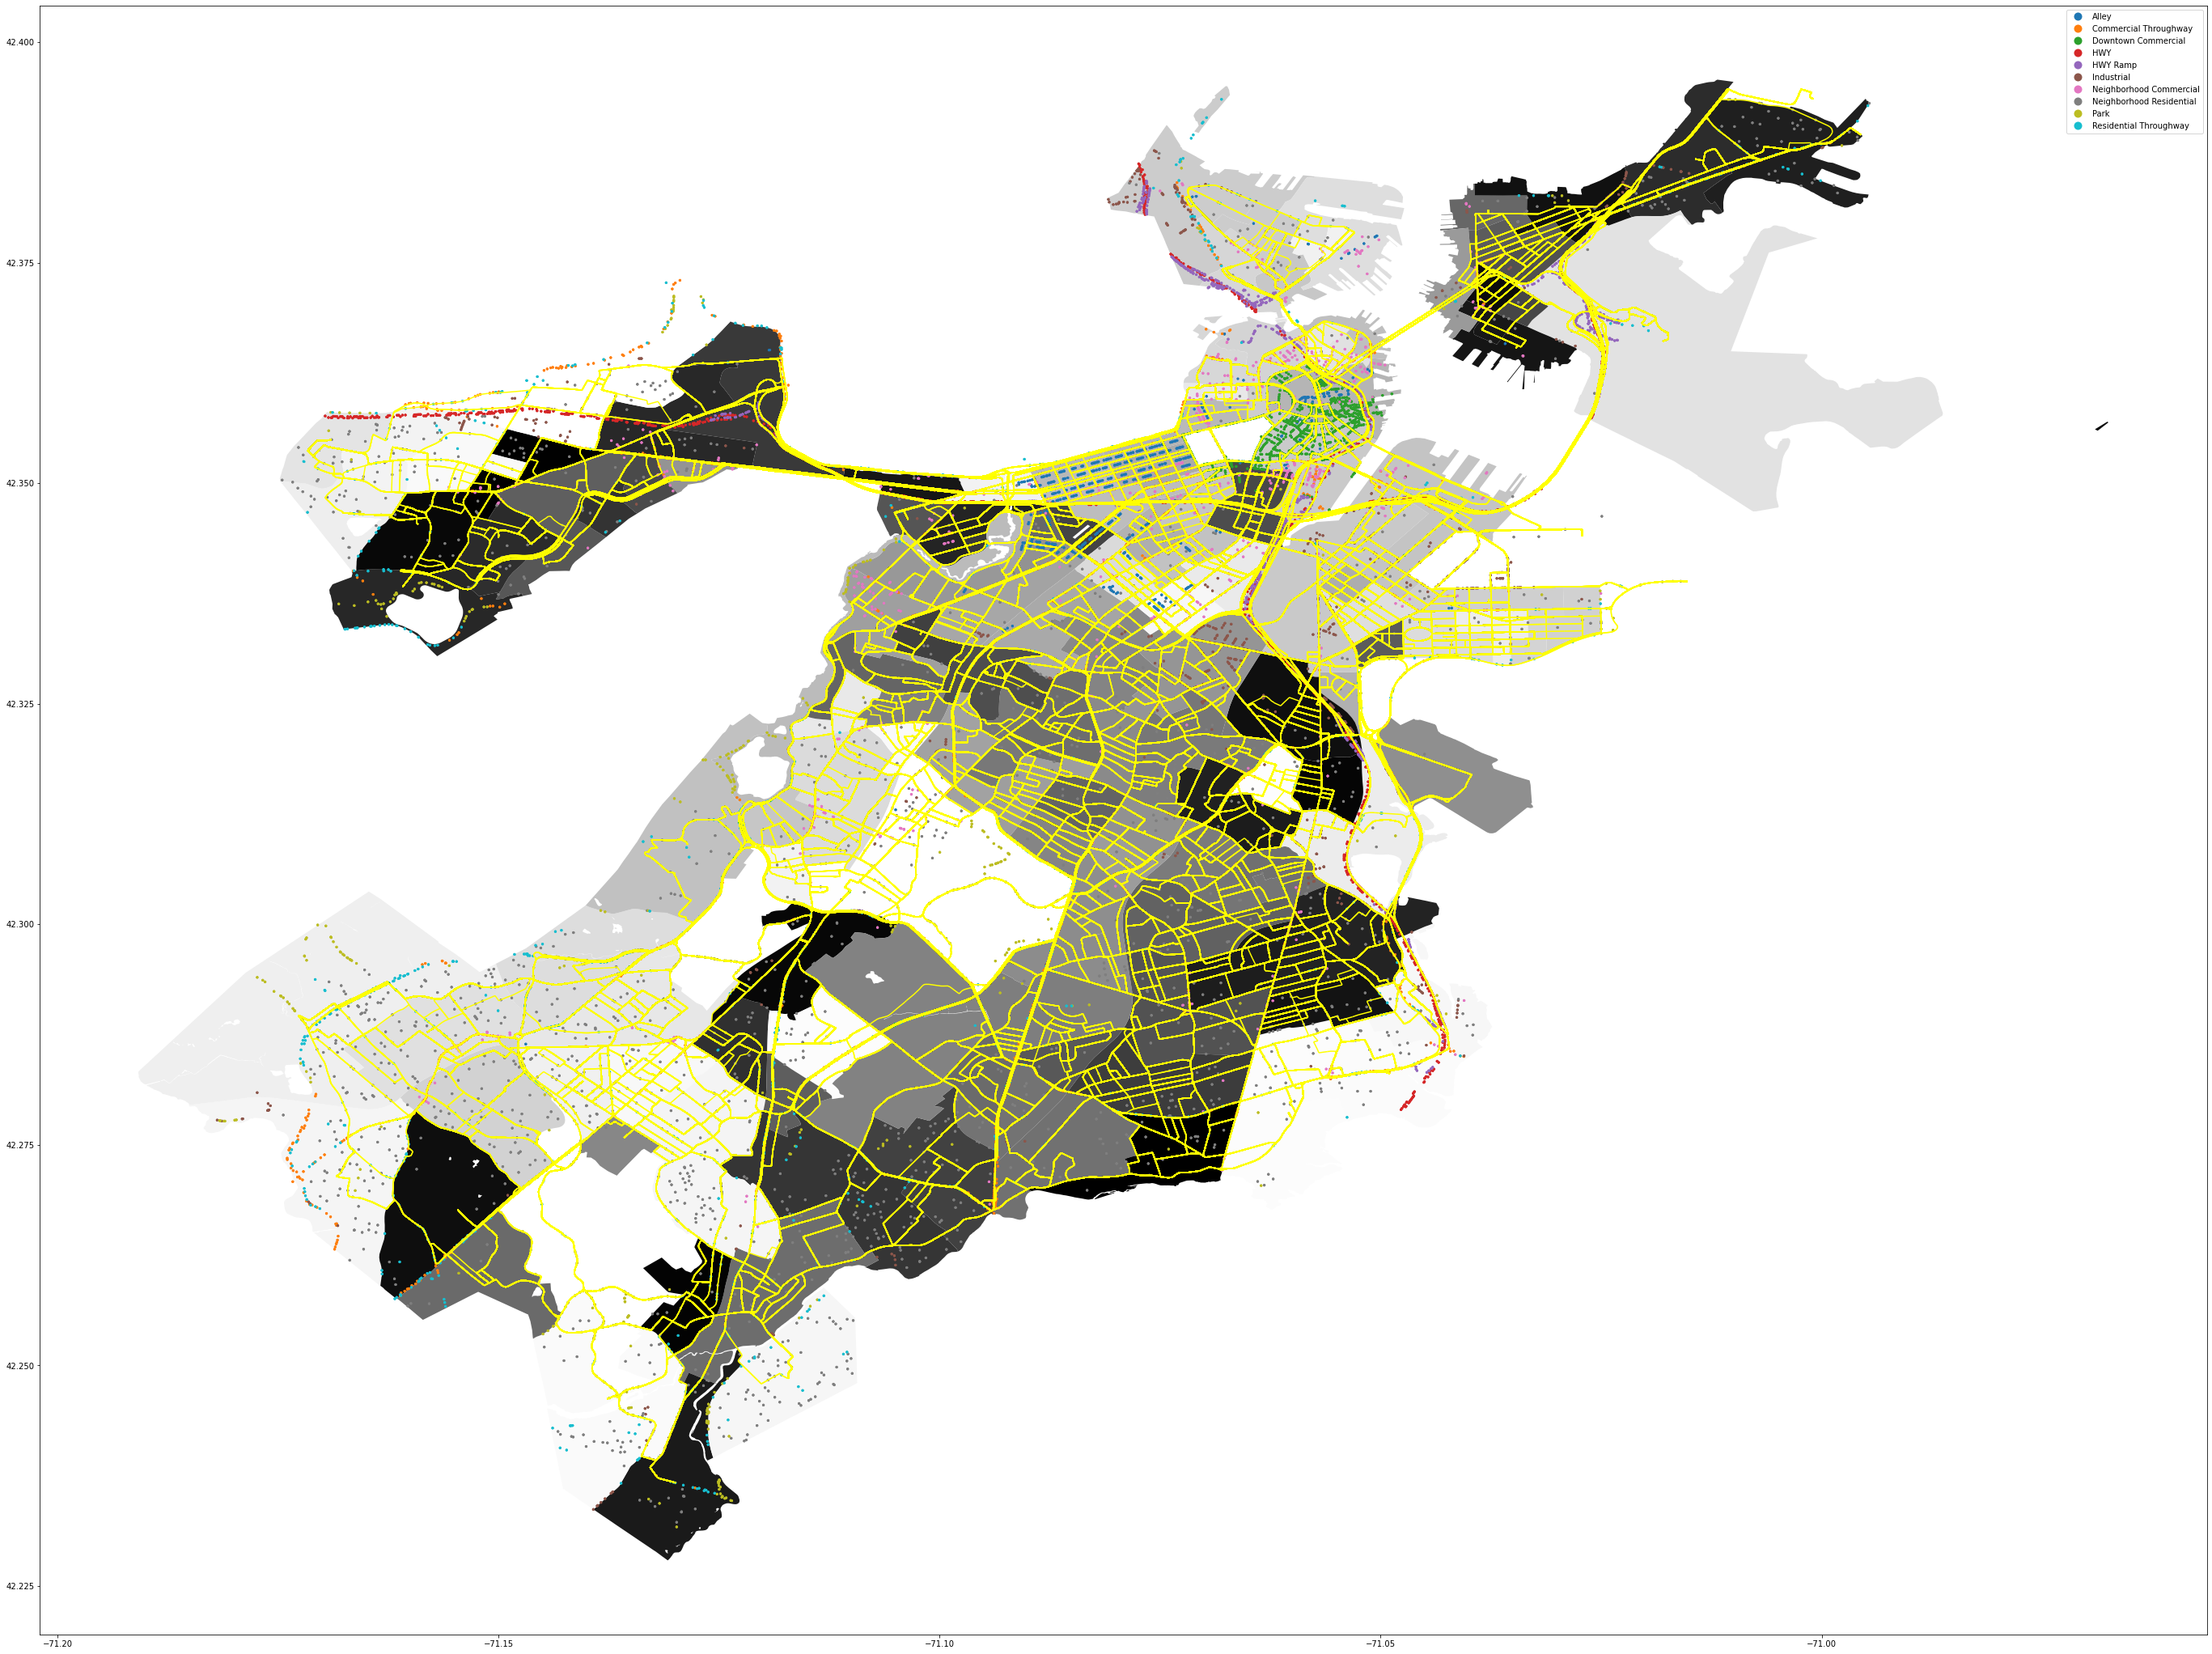

In [104]:
base=BostonIncomeTracts.plot(column='Mean income', cmap='Greys',figsize=[48,48],legend=True)
OD.plot(ax=base,markersize=0.1,color='#ffff00')
imgs.plot(ax=base,column='img_type',markersize=5,legend=True)

In [111]:
imgs.to_pickle('imglonlat.pkl')